In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import tkinter 
from tkinter import messagebox



Using TensorFlow backend.


In [2]:
img_width,img_height=150,150
train_data_dir='F:\Mini Project\Datasets\Castor\Train'
validation_data_dir='F:\Mini Project\Datasets\Castor\Validation'
no_training_samples=200
no_validation_samples=50
epochs=10
batch_size=20



In [3]:
if K.image_data_format()=='channels_first':  
    input_shape=(3,img_width, img_height)
else:
    input_shape=(img_width, img_height, 3)
    

In [4]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 426 images belonging to 2 classes.


In [6]:
validation_generator=test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 91 images belonging to 2 classes.


In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.summary()



model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
               metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
__________________________________

In [12]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=no_training_samples// batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=no_validation_samples // batch_size)

model.save_weights('first_try.h5')



Epoch 1/10
10/10 [==============================] - 7s 673ms/step - loss: 0.6175 - accuracy: 0.8400 - val_loss: 0.2722 - val_accuracy: 0.8500
Epoch 2/10
10/10 [==============================] - 5s 534ms/step - loss: 0.3233 - accuracy: 0.8871 - val_loss: 0.4755 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 7s 680ms/step - loss: 0.2951 - accuracy: 0.8950 - val_loss: 0.5938 - val_accuracy: 0.7419
Epoch 4/10
10/10 [==============================] - 6s 615ms/step - loss: 0.3087 - accuracy: 0.8978 - val_loss: 0.2385 - val_accuracy: 0.8500
Epoch 5/10
10/10 [==============================] - 6s 638ms/step - loss: 0.3006 - accuracy: 0.8763 - val_loss: 0.2050 - val_accuracy: 0.8387
Epoch 6/10
10/10 [==============================] - 6s 595ms/step - loss: 0.2621 - accuracy: 0.8750 - val_loss: 0.2560 - val_accuracy: 0.7750
Epoch 7/10
10/10 [==============================] - 6s 595ms/step - loss: 0.2938 - accuracy: 0.8600 - val_loss: 0.3642 - val_accuracy: 0.8000
Epoch 

In [31]:

model.save('catsanddogs.h5')





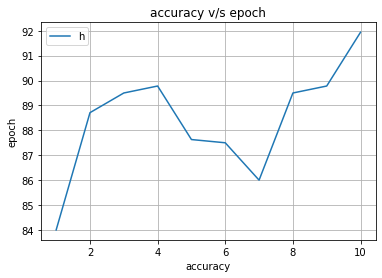

In [5]:
import matplotlib.pyplot as plt
import numpy as np

t = [84,88.71,89.5,89.78,87.63,87.5,86.00,89.50,89.78,91.94]
s = [1,2,3,4,5,6,7,8,9,10]
plt.plot(s,t)

plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend('hello')
plt.title('accuracy v/s epoch')
plt.grid(True)
plt.savefig("test.png")
plt.show()


In [32]:
 from keras.models import load_model
 new_model=load_model('catsanddogs.h5')


In [33]:
import tkinter 
from tkinter import messagebox
from tkinter import *
from PIL import Image
from PIL import ImageTk
from tkinter import ttk

window=tkinter.Tk()
window.title("Weed Detection Software")
label=tkinter.Label(window,text="Welcome to Weed Detection Software",fg="orange",font=("Arial Bold",30)).pack()
label1=tkinter.Label(window,text="Please upload your image to verify whether it is the image of a crop or a weed",fg="darkblue",font=("Arial Bold",15)).pack()
window.geometry('800x500')
bgImage=PhotoImage(file="F:\\Mini Project\\Background\\Background.png")
Label(window,image=bgImage).place(relwidth=1,relheight=1)
e=tkinter.Entry(window,width=10)
e.place(height=20,width=1000,relx=0.3,rely=0.3)





def clickme():
    
   # label2=tkinter.Label(window,text=hello).pack() 
    global s
    s=e.get()
    messagebox.showinfo("Upload Success!","Upload successful")
    img_pred=image.load_img(s,target_size=(150,150))
    img_pred=image.img_to_array(img_pred)
    img_pred=np.expand_dims(img_pred,axis=0)

    rslt=model.predict(img_pred)
    
    if rslt[0][0]==1:
        prediction="It's the Weed"
    else:
        prediction="It's the Castor Crop "
    print(prediction)
   
    messagebox.showinfo("Prediction Success!", prediction)
    print(s)
    

txt=tkinter.Entry(window,width=10)

bt=tkinter.Button(window,text="Upload!",bg="darkblue",fg="white",command=clickme)
label2=tkinter.Label(window,text="Enter the location of file in your system")
label2.place(relx=0,rely=0.3)
bt.pack()
bt.place(height=20, width=100,relx=0.5,rely=0.5) 

    



window.mainloop()




Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\YASHWANTH MACHIRAJU\Anaconda3\envs\yashwanth\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-33-74e14f0f97f2>", line 28, in clickme
    img_pred=image.load_img(s,target_size=(150,150))
  File "C:\Users\YASHWANTH MACHIRAJU\Anaconda3\envs\yashwanth\lib\site-packages\keras_preprocessing\image\utils.py", line 110, in load_img
    img = pil_image.open(path)
  File "C:\Users\YASHWANTH MACHIRAJU\Anaconda3\envs\yashwanth\lib\site-packages\PIL\Image.py", line 2809, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'F:\\Mini Project\\Datasets\\Castor\\Validation\\Castor Weed\\250.jpg'


It's the Weed
F:\Mini Project\Datasets\Castor\Validation\Castor Weed\7.jpg
It's the Weed
F:\Mini Project\Datasets\Castor\Validation\Castor Weed\8.jpg
It's the Weed
F:\Mini Project\Datasets\Castor\Validation\Castor Weed\9.jpg
It's the Weed
F:\Mini Project\Datasets\Castor\Validation\Castor Crop\249.jpg
It's the Castor Crop 
F:\Mini Project\Datasets\Castor\Validation\Castor Crop\250.jpg
It's the Castor Crop 
F:\Mini Project\Datasets\Castor\Validation\Castor Crop\251.jpg
It's the Castor Crop 
F:\Mini Project\Datasets\Castor\Validation\Castor Crop\252.jpg
It's the Castor Crop 
F:\Mini Project\Datasets\Castor\Validation\Castor Crop\253.jpg
It's the Castor Crop 
F:\Mini Project\Datasets\Castor\Validation\Castor Crop\254.jpg
